In [ ]:
# Import dependencie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm
import statistics

%matplotlib inline

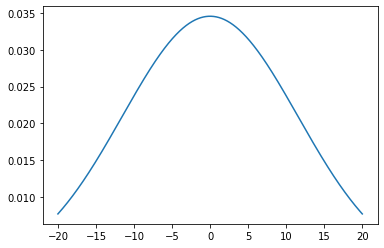

In [ ]:
# plot between -20 and 20 with 0.001 each step.
x_axis = np.arange(-20, 20, 0.01)
  
# getting mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

In [ ]:
# read in diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# looking for missing values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# looking at the database's size
diabetes_df.shape

(768, 9)

In [ ]:
# looking at the basic statistics measurement of the database
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# how many positive how many negative for diabetes?
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Looking at the basic statistics outcomes we can tell that there are some outliers in the database. It is impossible for a person to have 0 Glucose, 0 BloodPressure, 0 SkinThickness, 0 Insulin, and 0 BMI.

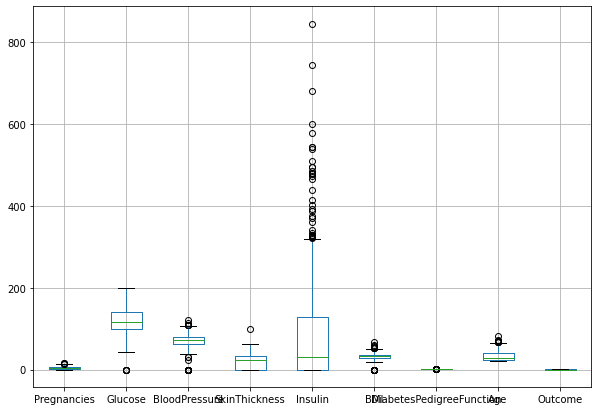

In [ ]:
# using boxplot to review outliers
fig = plt.figure(figsize =(10, 7))
diabetes_df.boxplot()

In [ ]:
# the insulin feature overshadow everything, let's drop it
drop_insulin_df = diabetes_df.drop(columns=['Insulin'])

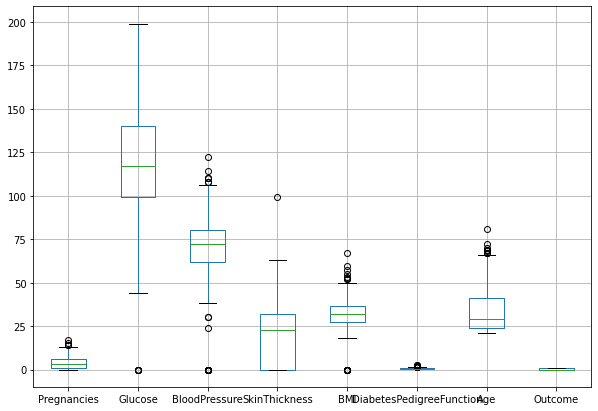

In [ ]:
# plot again to review outliers
fig = plt.figure(figsize =(10, 7))
drop_insulin_df.boxplot()

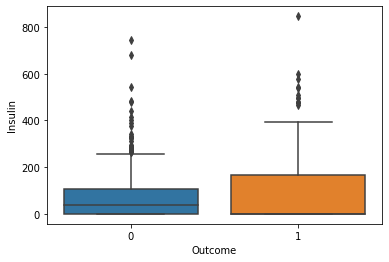

In [ ]:
# box plot outcome vs insulin
sns.boxplot(x='Outcome',y='Insulin',data=diabetes_df)
plt.show()

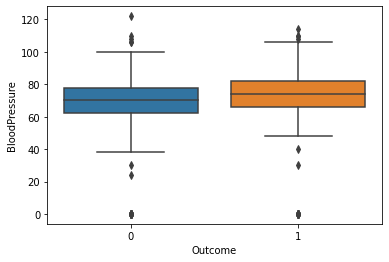

In [ ]:
# box plot outcome vs blood pressure
sns.boxplot(x='Outcome',y='BloodPressure',data=diabetes_df)
plt.show()

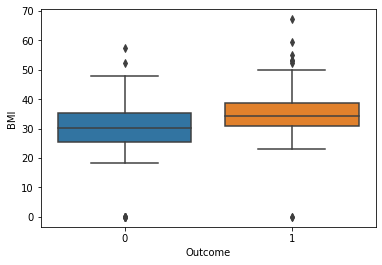

In [ ]:
# box plot outcome vs BMI
sns.boxplot(x='Outcome',y='BMI',data=diabetes_df)
plt.show()

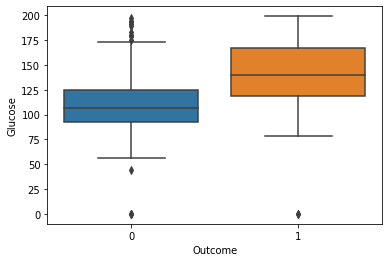

In [ ]:
# box plot outcome vs Glucose
sns.boxplot(x='Outcome',y='Glucose',data=diabetes_df)
plt.show()

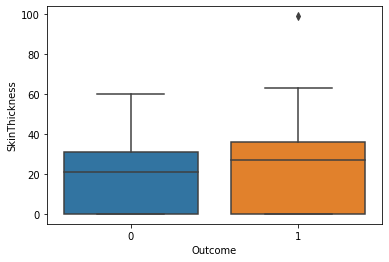

In [ ]:
# box plot outcome vs Skin Thickness
sns.boxplot(x='Outcome',y='SkinThickness',data=diabetes_df)
plt.show()

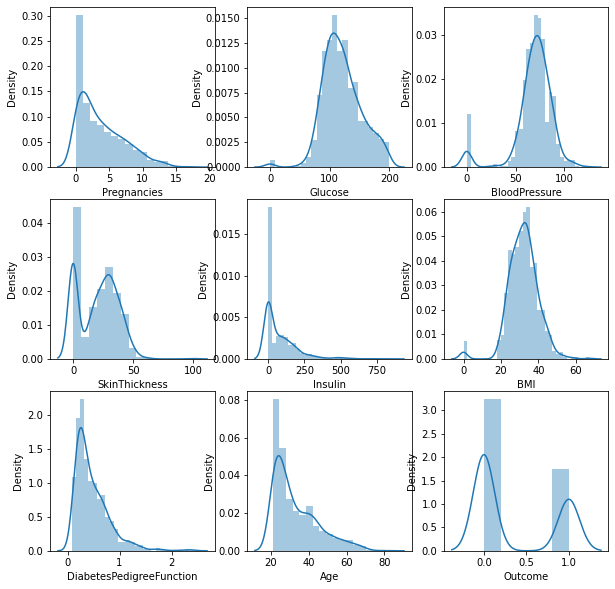

In [ ]:
# define the number of rows and columns to plot
n_rows=3
n_cols=3

# create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,10))
# fig, axes = plt.subplots(ncols=len(diabetes_df.columns), figsize=(8,15))

# suppress warning
warnings.filterwarnings("ignore")

# plot all features in the 3x3 matrix
for i, column in enumerate(diabetes_df.columns):
    sns.distplot(diabetes_df[column],ax=axes[i//n_cols,i%n_cols])

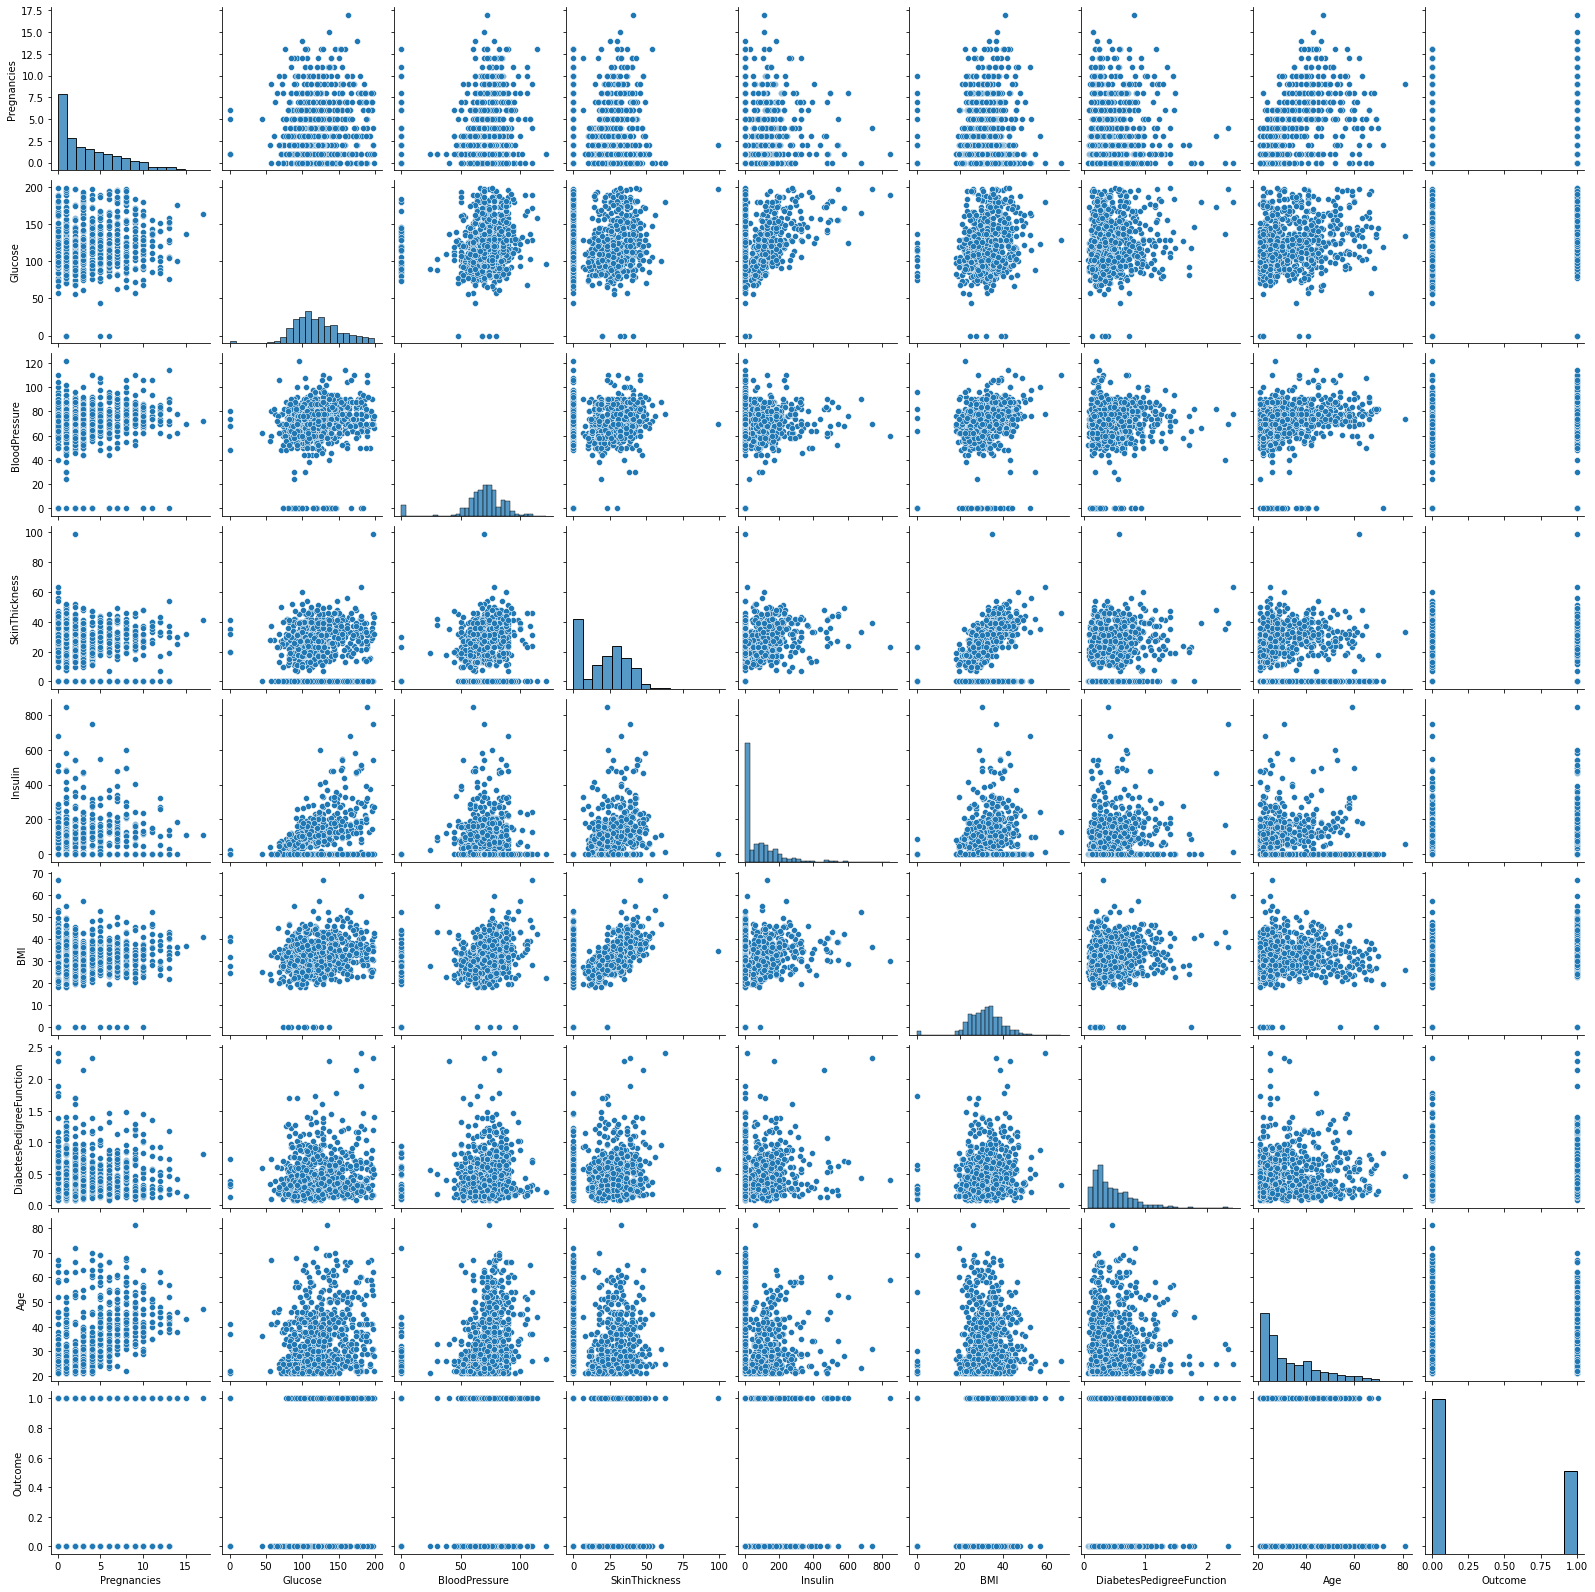

In [ ]:
sns.pairplot(diabetes_df)

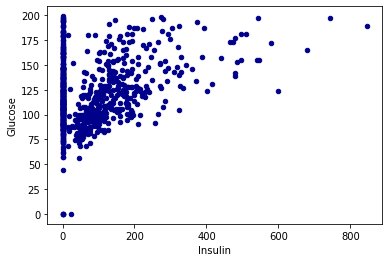

In [ ]:
# zoom in on Insulin vs Glucose
ax1 = diabetes_df.plot.scatter(x='Insulin', y='Glucose', c='DarkBlue')

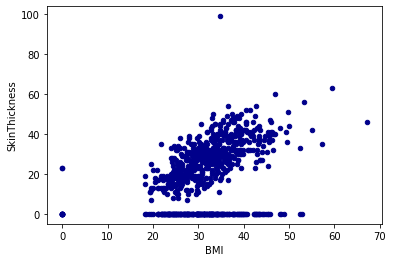

In [ ]:
# zoom in on BMI vs Skin Thickness
ax1 = diabetes_df.plot.scatter(x='BMI', y='SkinThickness', c='DarkBlue')

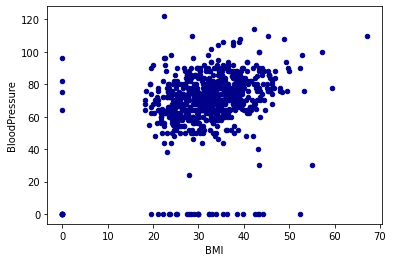

In [ ]:
# zoom in on BMI vs Blood Pressure
ax1 = diabetes_df.plot.scatter(x='BMI', y='BloodPressure', c='DarkBlue')

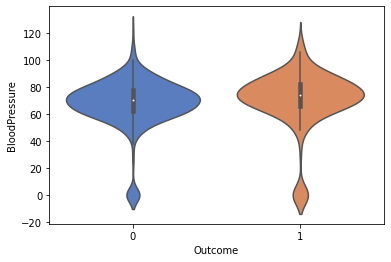

In [ ]:
# Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=diabetes_df, palette='muted', split=True)

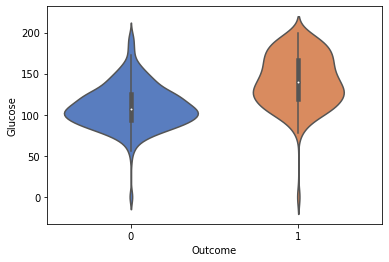

In [ ]:
# Classifying the Glucose based on class
ax = sns.violinplot(x='Outcome', y='Glucose', data=diabetes_df, palette='muted', split=True)

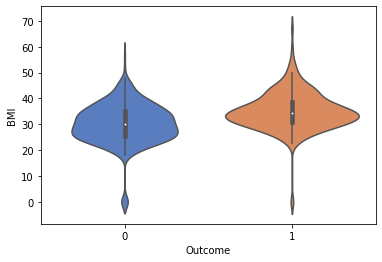

In [ ]:
# Classifying the BMI based on class
ax = sns.violinplot(x='Outcome', y='BMI', data=diabetes_df, palette='muted', split=True)

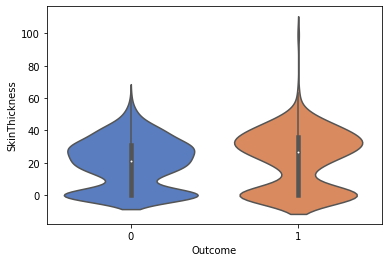

In [ ]:
# Classifying the Skin Thickness based on class
ax = sns.violinplot(x='Outcome', y='SkinThickness', data=diabetes_df, palette='muted', split=True)

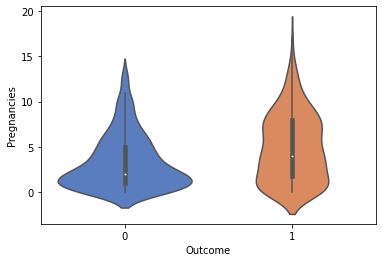

In [ ]:
# Classifying the Insulin based on class
ax = sns.violinplot(x='Outcome', y='Pregnancies', data=diabetes_df, palette='muted', split=True)

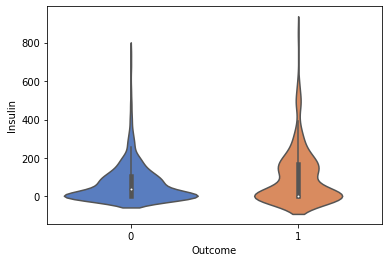

In [ ]:
# Classifying the Insulin based on class
ax = sns.violinplot(x='Outcome', y='Insulin', data=diabetes_df, palette='muted', split=True)

In [ ]:
# Replacing 0s in Blood Pressure with median from Blood Pressure with values with respective Outcome
# First thing first, capture values of all features with respective Outcomes
outcome1_df = diabetes_df.loc[diabetes_df['Outcome'] == 1]
outcome0_df = diabetes_df.loc[diabetes_df['Outcome'] == 0]

# Then assign median values of 'BloodPressure' from respective Outcomes to Outcomes with 0s
outcome1_df = outcome1_df.replace({'BloodPressure':0}, np.median(outcome1_df['BloodPressure']))
outcome0_df = outcome0_df.replace({'BloodPressure':0}, np.median(outcome0_df['BloodPressure']))

# Assigned new 'BloodPressure' column back to the dataframe
df = [outcome1_df, outcome0_df]
diabetes_df = pd.concat(df)

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.378906,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.104431,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Fill the rest using the same strategy
features = ['Insulin', 'Glucose', 'SkinThickness', 'BMI']
outcome1_df = diabetes_df.loc[diabetes_df['Outcome'] == 1]
outcome0_df = diabetes_df.loc[diabetes_df['Outcome'] == 0]
for feature in features:
  df=[]
  outcome1_df = outcome1_df.replace({feature:0}, np.median(outcome1_df[feature]))
  outcome0_df = outcome0_df.replace({feature:0}, np.median(outcome0_df[feature]))
  df = [outcome1_df, outcome0_df]
  diabetes_df = pd.concat(df)

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,91.783854,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,108.121136,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,39.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,39.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems like Insuli's median value is still 0 or there is something more to it? Let's try this code.


In [ ]:
diabetes_df['Insulin'] = diabetes_df['Insulin'].replace(0, diabetes_df['Insulin'].median())

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,98.791667,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,103.085316,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,39.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,39.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


Now we will look at some extreme values. It seems like we got some values that are very unusual. For example Insulin measurement of 846, BMI 67.1, skin thickness of 99, and pregnancies of 17 times.

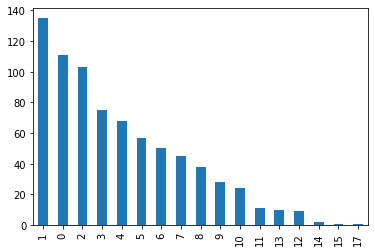

In [ ]:
# Validating if 17 pregnancies is an outlier or not
diabetes_df['Pregnancies'].value_counts().plot.bar()

In [ ]:
# There could be other outliers, we will deal with all.
# We will be using Z values to distinguish ouliers from normal data
from scipy import stats
z = np.abs(stats.zscore(diabetes_df))
print(z)

[[0.63994726 0.86462486 0.0313235  ... 0.46849198 1.4259954  1.36589591]
 [1.23388019 2.01426457 0.69266918 ... 0.60439732 0.10558415 1.36589591]
 [1.14185152 0.50330953 2.67670622 ... 5.4849091  0.0204964  1.36589591]
 ...
 [0.54791859 0.01060679 0.19665992 ... 0.39828208 0.53102292 0.73212021]
 [0.3429808  0.02224005 0.0313235  ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.94195182 0.19665992 ... 0.47378505 0.87137393 0.73212021]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([  2,   4,   7,  22,  23,  34,  40,  44,  44,  46,  46,  56,  62,
        62,  65,  84, 113, 142, 142, 157, 159, 170, 170, 170, 173, 199,
       201, 223, 229, 237, 239, 261, 274, 298, 299, 336, 346, 367, 409,
       409, 419, 446, 469, 496, 511, 513, 548, 552, 574, 622, 655, 658,
       673, 693, 710, 716]), array([6, 4, 4, 2, 6, 0, 4, 3, 5, 2, 5, 0, 2, 5, 4, 4, 0, 4, 6, 4, 4, 3,
       5, 6, 0, 3, 4, 4, 7, 2, 4, 4, 2, 3, 6, 2, 7, 4, 4, 6, 4, 4, 6, 6,
       4, 6, 7, 7, 4, 2, 6, 2, 6, 4, 5, 7]))


In [ ]:
 Z_diabetes_df = diabetes_df[(z < 3).all(axis=1)]

In [ ]:
Z_diabetes_df.shape

(719, 9)

Using Z-scores, we have removed some outliers and lowered the amount of available data that can be used. We only have 768 measurements and we lost 48 of them after removing the outliers. Due to the low amount of observations, every single one of them is precious. We will try another approach that does not remove outliers in the next section. In this section, we'll just remove outliers.

In [ ]:
# Defining quantile
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness               11.0000
Insulin                     88.2500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


In [ ]:
# Continue removing ouliers from Z_diabetes_df
trim_diabetes_df = Z_diabetes_df[~((Z_diabetes_df < (Q1 - 1.5 * IQR)) | (Z_diabetes_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
trim_diabetes_df.shape

(646, 9)

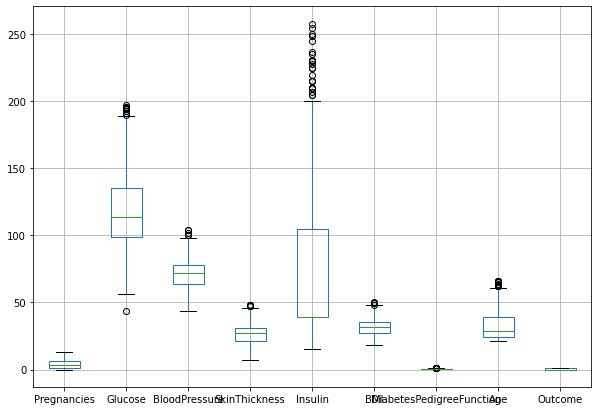

In [ ]:
fig = plt.figure(figsize =(10, 7))
trim_diabetes_df.boxplot()

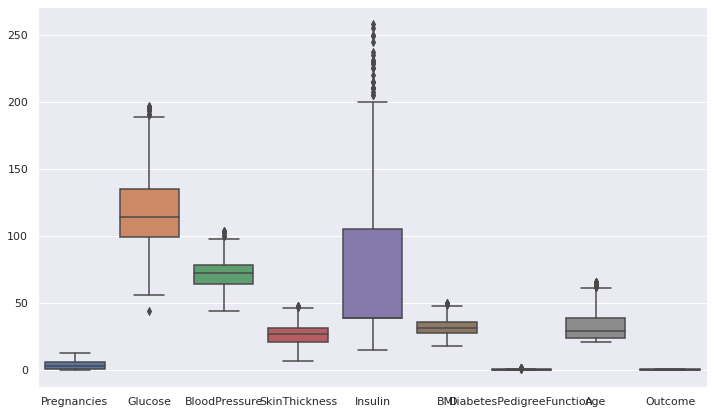

In [ ]:
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
sns.set(rc = {'figure.figsize':(12,7)})
p = sns.boxplot(data = trim_diabetes_df)

Now that we have a database completely clear of outliers however we lost so much information. Next we look at capping the extreme values.

In [ ]:
# Using IQR (Inter Quantile Range to identify outliers
# Creating a function to find the Upper Limit and Lower Limit of a variable
def find_limit(df, variable):
  Q1 = df[variable].quantile(0.25)
  Q3 = df[variable].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  return lower_limit, upper_limit

In [ ]:
# Getting the lower and upper limit of each feature
lower_BP, upper_BP = find_limit(diabetes_df, 'BloodPressure')
lower_Glucose, upper_Glucose = find_limit(diabetes_df, 'Glucose')
lower_Insulin, upper_Insulin = find_limit(diabetes_df, 'Insulin')
lower_BMI, upper_BMI = find_limit(diabetes_df, 'BMI')
lower_Preg, upper_Preg = find_limit(diabetes_df, 'Pregnancies')
lower_Skin, upper_Skin = find_limit(diabetes_df, 'SkinThickness')

In [ ]:
# Capping each feature, anything lower than lower limit, equals to lower limit, anything higher than upper limit, equals to upper limit
diabetes_df['BloodPressure'] = np.where(diabetes_df['BloodPressure'] > upper_BP, upper_BP,
                                        np.where(diabetes_df['BloodPressure'] < lower_BP, lower_BP, diabetes_df['BloodPressure']))

diabetes_df['Glucose'] = np.where(diabetes_df['Glucose'] > upper_Glucose, upper_Glucose,
                                        np.where(diabetes_df['Glucose'] < lower_Glucose, lower_Glucose, diabetes_df['Glucose']))

diabetes_df['Insulin'] = np.where(diabetes_df['Insulin'] > upper_Insulin, upper_Insulin,
                                        np.where(diabetes_df['Insulin'] < lower_Insulin, lower_Insulin, diabetes_df['Insulin']))

diabetes_df['BMI'] = np.where(diabetes_df['BMI'] > upper_BMI, upper_BMI,
                                        np.where(diabetes_df['BMI'] < lower_BMI, lower_BMI, diabetes_df['BMI']))

diabetes_df['Pregnancies'] = np.where(diabetes_df['Pregnancies'] > upper_Preg, upper_Preg,
                                        np.where(diabetes_df['Pregnancies'] < lower_Preg, lower_Preg, diabetes_df['Pregnancies']))

diabetes_df['BloodPressure'] = np.where(diabetes_df['BloodPressure'] > upper_BP, upper_BP,
                                        np.where(diabetes_df['BloodPressure'] < lower_BP, lower_BP, diabetes_df['BloodPressure']))

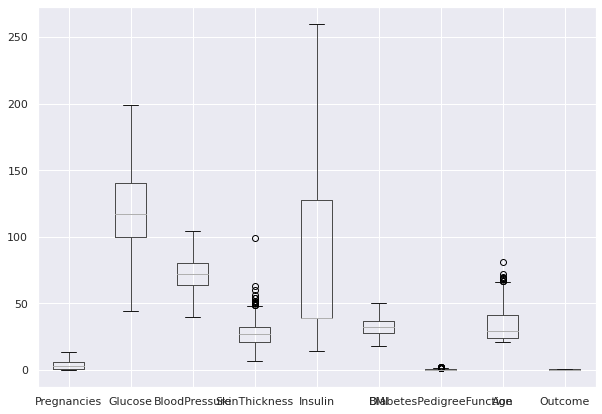

In [ ]:
fig = plt.figure(figsize =(10, 7))
diabetes_df.boxplot()

In [ ]:
diabetes_df.shape

(768, 9)

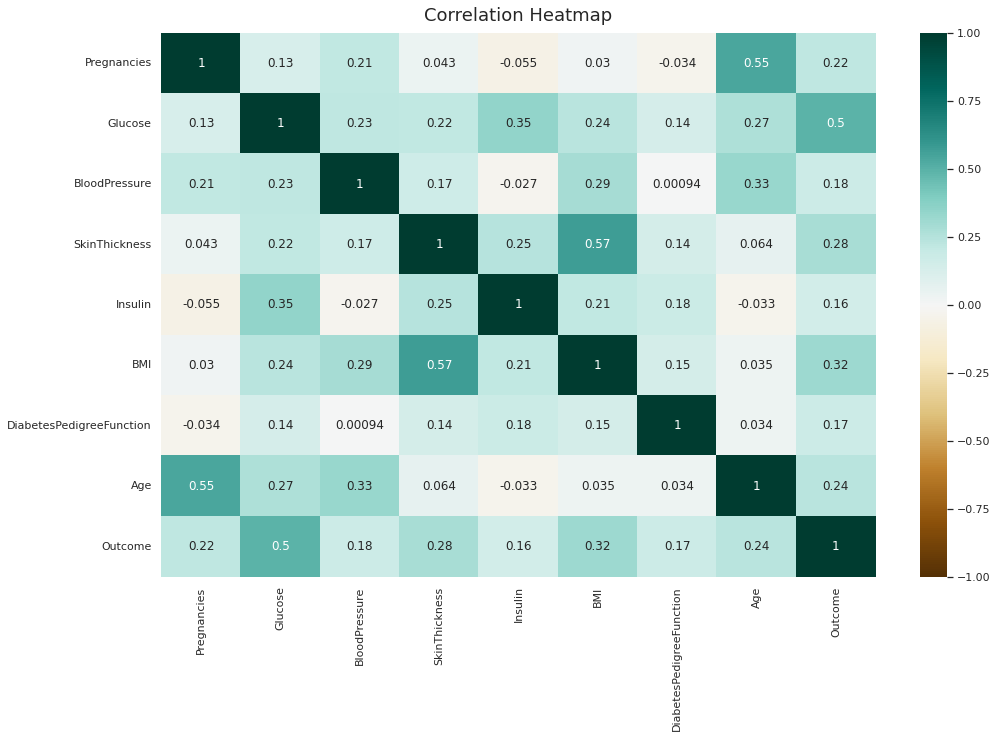

In [ ]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(diabetes_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);